# Review of classical electronic structure methods 

In order to assess the performance of quantum computing algorithms in addressing the electronic structure problem, we will briefly review a few commonly employed classical electronic structure methods of varying level of approximation. 

## Hartree-Fock

The Hartree-Fock (HF) method employs a **mean-field approximation**, where Coulomb correlation of electrons is neglected. The HF wavefunction is hence restricted to the form of a single Slater determinant, for which the optimal form may be acquired by an optimization of the underlying single particle basis (orbitals). Once the optimal HF orbitals have been found, the HF state may be written as 

$$ | \text{HF} \rangle = \prod_{p \in \text{occ}} \hat a^\dagger_p | \text{vac} \rangle $$

where $\hat a^\dagger_p$ creates an electron in the $p^{\rm{th}}$ optimized HF spin orbital, and  $| \text{vac} \rangle$ is the vacuum state (all spin-orbitals unoccupied). Due to the restriction to a single Slater determinant, the HF energy may be obtained very efficiently and can be applied to very large molecules, however it becomes qualitatively incorrect when **electronic correlations** become sufficiently strong. The HF wavefunction is often used as a starting point in more accurate treatments of electronic correlation. 

## Coupled cluster

The Coupled cluster (CC) method introduces electronic correlation to the wavefunction ansatz by operating on the HF reference state with the exponential of excitation operators

$$|\text{CC} \rangle = e^{\hat T} | \text{HF}\rangle, \quad \hat T = \hat T_1 + \hat T_2 + ...$$

where $\hat T_1 = \sum_{ia} t^{a}_i \hat a^\dagger_a \hat a_i$ are referred to as 'singles', $\hat T_2 = \sum_{ijab} t^{ab}_{ij} \hat a^\dagger_a \hat a^\dagger_b \hat a_i \hat a_j$ as 'doubles', etc. When the excitation rank is truncated to only singles (S) and doubles (D), $\hat T = \hat T_1 + \hat T_2$, the corresponding ansatz is referred to as CCSD. Since the number of possible single and double excitations for a system of $N$ electrons in $M$ orbitals is polynomial in $M$, one can efficiently solve a system of equations to obtain the optimized CCSD amplitudes. CCSD often gives accurate energies and can be applied to modestly sized chemical systems. However, due to its implementation, it can **violate the variational principle** and give energies lower than the ground state.

## Full Configuration Interaction
The full configuration interaction (FCI) method yields the **exact ground state energy** within a given basis set. The FCI wavefunction is written as a linear combination of all possible $N$-particle Slater determinants over the orbital basis
$$|\text{FCI} \rangle =  \left( \sum_{ia} C^{a}_i \hat a^\dagger_a \hat a_i + \sum_{ijab} C^{ab}_{ij} \hat a^\dagger_a \hat a^\dagger_b \hat a_i \hat a_j + ...  \right) | \text{HF} \rangle $$
where the sum includes up to $N$-electron excitations, and hence there are an exponential number of coefficients to optimize in $| \text{FCI} \rangle$. Due to its **exponential complexity**, FCI is often reserved for only the smallest chemical systems. However, it serves as a useful result to compare to when assessing tractable electronic structure methods.

# Benchmarking for electronic PESs in minimal basis (STO-3G)

We will apply HF, CCSD, and FCI to obtaining the PESs for a few molecular dissociation processes in minimal (STO-3G) basis.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utility import get_molecular_data, obtain_PES

basis = 'sto-3g'

/home/ushnish/.local/lib/python3.9/site-packages/pyscf/lib/misc.py:46: H5pyDeprecationWarning: Using default_file_mode other than 'r' is deprecated. Pass the mode to h5py.File() instead.
  h5py.get_config().default_file_mode = 'a'


## H<sub>2</sub>

In [2]:
bond_lengths = np.linspace(0.2,2.6,15)

In [3]:
#Run FCI
FCI_PES = obtain_PES('h2', bond_lengths, basis, method='fci')

converged SCF energy = 0.164175012061695
E = 0.15748213479836348 Eh
converged SCF energy = -0.839684083956067
E = -0.8488991057547286 Eh
converged SCF energy = -1.07486102490599
E = -1.0882281842437163 Eh
converged SCF energy = -1.11750157922789
E = -1.1369289593879264 Eh
converged SCF energy = -1.09513510118901
E = -1.1229570528666362 Eh
converged SCF energy = -1.04953250777026
E = -1.0887645366068759 Eh
converged SCF energy = -0.995976005034107
E = -1.050442037345773 Eh
converged SCF energy = -0.941480654707798
E = -1.0154682492882445 Eh
converged SCF energy = -0.889889958382754
E = -0.9873930556257475 Eh
converged SCF energy = -0.843174458569733
E = -0.9670259116896882 Eh
converged SCF energy = -0.80213543384489
E = -0.953424238929029 Eh
converged SCF energy = -0.766864889751915
E = -0.9449089871327179 Eh
converged SCF energy = -0.737027158095765
E = -0.9398197912427146 Eh
converged SCF energy = -0.712060259734193
E = -0.9368706035430501 Eh
converged SCF energy = -0.691327561197377


In [4]:
#Run HF
HF_PES = obtain_PES('h2', bond_lengths, basis,  method='hf')

converged SCF energy = 0.164175012061695
converged SCF energy = 0.164175012061696
E = 0.16417501206169582 Eh
converged SCF energy = -0.839684083956067


Overwritten attributes  get_ovlp get_hcore  of <class 'pyscf.scf.hf.RHF'>


converged SCF energy = -0.839684083956067
E = -0.8396840839560673 Eh
converged SCF energy = -1.07486102490599
converged SCF energy = -1.07486102490599
E = -1.0748610249059865 Eh
converged SCF energy = -1.11750157922789
converged SCF energy = -1.11750157922789
E = -1.1175015792278884 Eh
converged SCF energy = -1.09513510118901
converged SCF energy = -1.09513510118901
E = -1.0951351011890111 Eh
converged SCF energy = -1.04953250777026
converged SCF energy = -1.04953250777026
E = -1.0495325077702624 Eh
converged SCF energy = -0.995976005034107
converged SCF energy = -0.995976005034107
E = -0.9959760050341071 Eh
converged SCF energy = -0.941480654707798
converged SCF energy = -0.941480654707798
E = -0.9414806547077981 Eh
converged SCF energy = -0.889889958382754
converged SCF energy = -0.889889958382754
E = -0.889889958382754 Eh
converged SCF energy = -0.843174458569733
converged SCF energy = -0.843174458569733
E = -0.8431744585697332 Eh
converged SCF energy = -0.80213543384489
converged S

In [5]:
#Run CCSD
CCSD_PES = obtain_PES('h2', bond_lengths, basis,  method='ccsd')

converged SCF energy = 0.164175012061695
E(CCSD) = 0.1574821318755476  E_corr = -0.00669288018614819
E = 0.15748213187554763 Eh
converged SCF energy = -0.839684083956067
E(CCSD) = -0.8488991194884047  E_corr = -0.009215035532337343
E = -0.8488991194884047 Eh
converged SCF energy = -1.07486102490599
E(CCSD) = -1.088228226369218  E_corr = -0.01336720146323128
E = -1.0882282263692178 Eh
converged SCF energy = -1.11750157922789
E(CCSD) = -1.136929092564818  E_corr = -0.01942751333692954
E = -1.136929092564818 Eh
converged SCF energy = -1.09513510118901
E(CCSD) = -1.122957052870124  E_corr = -0.0278219516811127
E = -1.1229570528701238 Eh
converged SCF energy = -1.04953250777026
E(CCSD) = -1.088764536633295  E_corr = -0.03923202886303246
E = -1.088764536633295 Eh
converged SCF energy = -0.995976005034107
E(CCSD) = -1.050442037622604  E_corr = -0.05446603258849664
E = -1.0504420376226038 Eh
converged SCF energy = -0.941480654707798
E(CCSD) = -1.015468249381512  E_corr = -0.07398759467371405
E

In [6]:
#Run CISD
CISD_PES = obtain_PES('h2', bond_lengths, basis,  method='cisd')

converged SCF energy = 0.164175012061695
converged SCF energy = 0.164169934139604
converged SCF energy = 0.164164856241362
converged SCF energy = 0.164159778366972
converged SCF energy = 0.164154700516431
converged SCF energy = 0.164149622689742
converged SCF energy = 0.164144544886901
converged SCF energy = 0.164139467107911
converged SCF energy = 0.164134389352771
converged SCF energy = 0.16412931162148
Could not converge
converged SCF energy = -0.839684083956067
converged SCF energy = -0.839685147413591
converged SCF energy = -0.839686210867527
converged SCF energy = -0.839687274317878
converged SCF energy = -0.839688337764643
converged SCF energy = -0.839689401207823
converged SCF energy = -0.839690464647417
converged SCF energy = -0.839691528083426
converged SCF energy = -0.839692591515849
converged SCF energy = -0.839693654944685
Could not converge
converged SCF energy = -1.07486102490599
converged SCF energy = -1.07486127982276
converged SCF energy = -1.07486153473851
converged 

In [8]:
import pyscf
from pyscf import gto

def get_cisd_pes(molname, bond_lengths):
    
    CISD_PES = np.zeros(len(bond_lengths))
    for i in range(len(bond_lengths)):
        mol = gto.Mole()
        mol.atom = get_molecular_data(molname, bond_lengths[i], xyz_format=False)
        mol.basis = 'sto3g'
        mol.build()

        mf = mol.HF().run()
        mycc = mf.CISD().run()

        CISD_PES[i] = mycc.e_tot

    return CISD_PES

In [8]:
CISD_PES = get_cisd_pes('h2',bond_lengths)

converged SCF energy = 0.16412423391404
E(RCISD) = 0.1574313136580771  E_corr = -0.006692920255962703
converged SCF energy = -0.839694718442279
E(RCISD) = -0.8489098212015191  E_corr = -0.009215102759239983
converged SCF energy = -1.07486357400168
E(RCISD) = -1.088230857028833  E_corr = -0.01336728302715211
converged SCF energy = -1.11750156165314
E(RCISD) = -1.136929116722402  E_corr = -0.01942755506925981
converged SCF energy = -1.09513417536619
E(RCISD) = -1.122956366299934  E_corr = -0.02782219093373877
converged SCF energy = -1.04953125485482
E(RCISD) = -1.088763607063101  E_corr = -0.03923235220827748
converged SCF energy = -0.995974660817957
E(RCISD) = -1.050441118298806  E_corr = -0.05446645748084813
converged SCF energy = -0.941479343956937
E(RCISD) = -1.015467468777826  E_corr = -0.07398812482088873
converged SCF energy = -0.889888748940403
E(RCISD) = -0.9873924633454189  E_corr = -0.09750371440501605
converged SCF energy = -0.843173382047679
E(RCISD) = -0.9670255017003269  E

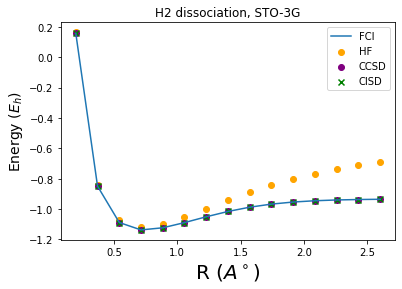

In [9]:
#Plot H2 PESs

plt.title('H2 dissociation, STO-3G')
plt.xlabel(r'R ($A^\circ$)',fontsize=20)
plt.ylabel(r'Energy ($E_h$)',fontsize=14)

plt.plot(bond_lengths, FCI_PES, label='FCI')
plt.scatter(bond_lengths, HF_PES, label='HF', color='orange')
plt.scatter(bond_lengths, CCSD_PES, label='CCSD', color='purple')
plt.scatter(bond_lengths, CISD_PES, label='CISD', color='green', marker='x')

plt.legend()

## H<sub>2</sub>O symmetric O-H dissociation

In [10]:
bond_lengths = np.linspace(0.5,2.7,15)

In [11]:
#Run FCI
FCI_PES = obtain_PES('h2o', bond_lengths, basis, method='fci')

converged SCF energy = -73.1294523897688
E = -73.14278405666445 Eh
converged SCF energy = -74.4533755394604
E = -74.47523205124747 Eh
converged SCF energy = -74.870474914869
E = -74.90413378004637 Eh
converged SCF energy = -74.9629980695871
E = -75.01383133947519 Eh
converged SCF energy = -74.9280772606054
E = -75.00356512179694 Eh
converged SCF energy = -74.8427106360511
E = -74.95170869149446 Eh
converged SCF energy = -74.7404009823899
E = -74.8921864824038 Eh
converged SCF energy = -74.6356397052129
E = -74.83923063682425 Eh
converged SCF energy = -74.5355993564524
E = -74.79866365949064 Eh
converged SCF energy = -74.4447494379007
E = -74.77161515193761 Eh
converged SCF energy = -74.3648409739232
E = -74.75568947210506 Eh
converged SCF energy = -74.2975641705531
E = -74.74704715180513 Eh
converged SCF energy = -74.2414470355423
E = -74.65097549250456 Eh
converged SCF energy = -74.2701898592245
E = -74.73852377799331 Eh
SCF not converged.
SCF energy = -72.9767073788912
E = -74.738419

In [12]:
#Run HF
HF_PES = obtain_PES('h2o', bond_lengths, basis,  method='hf')

converged SCF energy = -73.1294523897688
converged SCF energy = -73.1294523897688
E = -73.12945238976884 Eh
converged SCF energy = -74.4533755394603
converged SCF energy = -74.4533755394603
E = -74.45337553946032 Eh
converged SCF energy = -74.870474914869
converged SCF energy = -74.870474914869
E = -74.87047491486898 Eh
converged SCF energy = -74.9629980695872
converged SCF energy = -74.9629980695871
E = -74.9629980695871 Eh
converged SCF energy = -74.9280772606054
converged SCF energy = -74.9280772606054
E = -74.92807726060545 Eh
converged SCF energy = -74.8427106360511
converged SCF energy = -74.8427106360511
E = -74.84271063605105 Eh
converged SCF energy = -74.7404009823899
converged SCF energy = -74.7404009823898
E = -74.74040098238983 Eh
converged SCF energy = -74.6356397052129
converged SCF energy = -74.6356397052129
E = -74.63563970521294 Eh
converged SCF energy = -74.5355993564525
converged SCF energy = -74.5355993564523
E = -74.53559935645225 Eh
converged SCF energy = -74.4447

In [13]:
#Run CCSD
CCSD_PES = obtain_PES('h2o', bond_lengths, basis,  method='ccsd')

converged SCF energy = -73.1294523897688
E(CCSD) = -73.14276521635894  E_corr = -0.01331282659012168
E = -73.14276521635894 Eh
converged SCF energy = -74.4533755394603
E(CCSD) = -74.47519627862118  E_corr = -0.02182073916078394
E = -74.47519627862118 Eh
converged SCF energy = -74.870474914869
E(CCSD) = -74.90406496739165  E_corr = -0.03359005252268954
E = -74.90406496739165 Eh
converged SCF energy = -74.9629980695871
E(CCSD) = -75.01370059196519  E_corr = -0.05070252237808309
E = -75.01370059196519 Eh
converged SCF energy = -74.9280772606054
E(CCSD) = -75.00329904142161  E_corr = -0.0752217808162044
E = -75.00329904142161 Eh
converged SCF energy = -74.8427106360511
E(CCSD) = -74.95116129966111  E_corr = -0.1084506636100818
E = -74.95116129966111 Eh
converged SCF energy = -74.7404009823899
E(CCSD) = -74.89127919056963  E_corr = -0.1508782081797506
E = -74.89127919056963 Eh
converged SCF energy = -74.6356397052129
E(CCSD) = -74.83854079640633  E_corr = -0.2029010911934011
E = -74.8385407

In [14]:
CISD_PES = get_cisd_pes('h2o',bond_lengths)

converged SCF energy = -73.1294523895249
E(RCISD) = -73.14274671598832  E_corr = -0.01329432646338393
converged SCF energy = -74.4533755394552
E(RCISD) = -74.47513048268902  E_corr = -0.0217549432338664
converged SCF energy = -74.8704749148569
E(RCISD) = -74.90385790761569  E_corr = -0.03338299275878548
converged SCF energy = -74.9629980695849
E(RCISD) = -75.01306780040228  E_corr = -0.05006973081739167
converged SCF energy = -74.9280772606096
E(RCISD) = -75.00147251995749  E_corr = -0.07339525934793231
converged SCF energy = -74.8427106360412
E(RCISD) = -74.94643477106142  E_corr = -0.1037241350201805
converged SCF energy = -74.7404009823891
E(RCISD) = -74.88052836034142  E_corr = -0.1401273779522889
converged SCF energy = -74.635639705199
E(RCISD) = -74.81679144091009  E_corr = -0.1811517357110971
converged SCF energy = -74.5355993564465
E(RCISD) = -74.76098824931614  E_corr = -0.225388892869624
converged SCF energy = -74.4447494378857
E(RCISD) = -74.7163145024669  E_corr = -0.271565

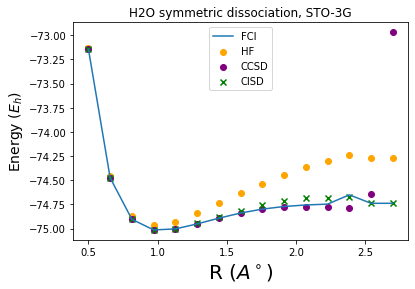

In [15]:
#Plot H2O PESs

plt.title('H2O symmetric dissociation, STO-3G')
plt.xlabel(r'R ($A^\circ$)',fontsize=20)
plt.ylabel(r'Energy ($E_h$)',fontsize=14)

plt.plot(bond_lengths, FCI_PES, label='FCI')
plt.scatter(bond_lengths, HF_PES, label='HF', color='orange')
plt.scatter(bond_lengths, CCSD_PES, label='CCSD', color='purple')
plt.scatter(bond_lengths, CISD_PES, label='CISD', color='green', marker='x')
plt.legend(loc = 'upper center')

Next we compute the PEs for other types of molecules
$LiH$, $N_2$, $H_4$, and $NH_3$

$LiH$

$r_0 = 1.619$ Angstrom

In [16]:
#Starting with LiH
#r_eqb = 1.619 Ang
bond_lengths = [x for x in np.linspace(1.0,1.619,7)] 
bond_lengths = bond_lengths[:-1]
bond_lengths += [x for x in np.linspace(1.619,2.7,8)]
print(bond_lengths)


[1.0, 1.1031666666666666, 1.2063333333333333, 1.3094999999999999, 1.4126666666666667, 1.5158333333333334, 1.619, 1.7734285714285714, 1.927857142857143, 2.0822857142857143, 2.2367142857142857, 2.3911428571428575, 2.545571428571429, 2.7]


In [17]:
#Run FCI
FCI_PES = obtain_PES('lih', bond_lengths, basis, method='fci')

converged SCF energy = -7.76736213574856
E = -7.78446028003123 Eh
converged SCF energy = -7.80979176463783
E = -7.8265810331209655 Eh
converged SCF energy = -7.83692872384727
E = -7.8537567404016535 Eh
converged SCF energy = -7.85306658932547
E = -7.8703065130887655 Eh
converged SCF energy = -7.86118008465405
E = -7.879213083453221 Eh
converged SCF energy = -7.86337692068677
E = -7.882587446751686 Eh
converged SCF energy = -7.86118812320016
E = -7.881966102188458 Eh
converged SCF energy = -7.85210876795008
E = -7.875986257595848 Eh
converged SCF energy = -7.83838177201205
E = -7.866316816255415 Eh
converged SCF energy = -7.82179682213268
E = -7.854833029562926 Eh
converged SCF energy = -7.80355661022601
E = -7.842840943624406 Eh
converged SCF energy = -7.78448734730311
E = -7.831267953080066 Eh
converged SCF energy = -7.76517971175667
E = -7.8207640214175 Eh
converged SCF energy = -7.74607970736099
E = -7.811735339124828 Eh


In [18]:
#Run HF
HF_PES = obtain_PES('lih', bond_lengths, basis,  method='hf')

converged SCF energy = -7.76736213574857
converged SCF energy = -7.76736213574858
E = -7.767362135748582 Eh
converged SCF energy = -7.80979176463783
converged SCF energy = -7.80979176463784
E = -7.809791764637841 Eh
converged SCF energy = -7.83692872384727
converged SCF energy = -7.83692872384727
E = -7.836928723847274 Eh
converged SCF energy = -7.85306658932547
converged SCF energy = -7.8530665893276
E = -7.853066589327602 Eh
converged SCF energy = -7.86118008465405
converged SCF energy = -7.86118008465472
E = -7.861180084654718 Eh
converged SCF energy = -7.86337692068678
converged SCF energy = -7.86337692068678
E = -7.863376920686776 Eh
converged SCF energy = -7.86118812320015
converged SCF energy = -7.86118812320016
E = -7.861188123200157 Eh
converged SCF energy = -7.85210876795008
converged SCF energy = -7.85210876795008
E = -7.852108767950082 Eh
converged SCF energy = -7.83838177201204
converged SCF energy = -7.83838177201205
E = -7.838381772012054 Eh
converged SCF energy = -7.821

In [19]:
#Run CCSD
CCSD_PES = obtain_PES('lih', bond_lengths, basis,  method='ccsd')

converged SCF energy = -7.76736213574856
E(CCSD) = -7.784454825910823  E_corr = -0.01709269016226172
E = -7.7844548259108235 Eh
converged SCF energy = -7.80979176463783
E(CCSD) = -7.826575204641611  E_corr = -0.01678344000377575
E = -7.826575204641611 Eh
converged SCF energy = -7.83692872384727
E(CCSD) = -7.853750205060463  E_corr = -0.01682148121319228
E = -7.853750205060463 Eh
converged SCF energy = -7.85306658932547
E(CCSD) = -7.87029907962143  E_corr = -0.01723249029595915
E = -7.87029907962143 Eh
converged SCF energy = -7.86118008465405
E(CCSD) = -7.879204638475544  E_corr = -0.01802455382149374
E = -7.879204638475544 Eh
converged SCF energy = -7.86337692068677
E(CCSD) = -7.882577891331048  E_corr = -0.01920097064427495
E = -7.882577891331048 Eh
converged SCF energy = -7.86118812320016
E(CCSD) = -7.881955303298599  E_corr = -0.02076718009844029
E = -7.881955303298599 Eh
converged SCF energy = -7.85210876795008
E(CCSD) = -7.875973198854202  E_corr = -0.0238644309041235
E = -7.87597

In [20]:
CISD_PES = get_cisd_pes('lih',bond_lengths)

converged SCF energy = -7.76736213574855
E(RCISD) = -7.784451852608674  E_corr = -0.01708971686011873
converged SCF energy = -7.80979176462687
E(RCISD) = -7.826572604171981  E_corr = -0.01678083954510819
converged SCF energy = -7.83692872385407
E(RCISD) = -7.853747789283756  E_corr = -0.01681906542968236
converged SCF energy = -7.85306658932546
E(RCISD) = -7.870296696278254  E_corr = -0.01723010695279562
converged SCF energy = -7.86118008465248
E(RCISD) = -7.879202170415576  E_corr = -0.01802208576309941
converged SCF energy = -7.86337692068671
E(RCISD) = -7.882575250021095  E_corr = -0.01919832933438547
converged SCF energy = -7.86118812320016
E(RCISD) = -7.881952418227401  E_corr = -0.02076429502724274
converged SCF energy = -7.8521087679479
E(RCISD) = -7.875969836904649  E_corr = -0.02386106895675046
converged SCF energy = -7.83838177201632
E(RCISD) = -7.866296783944052  E_corr = -0.02791501192773272
converged SCF energy = -7.82179682213431
E(RCISD) = -7.854808151441107  E_corr = -0

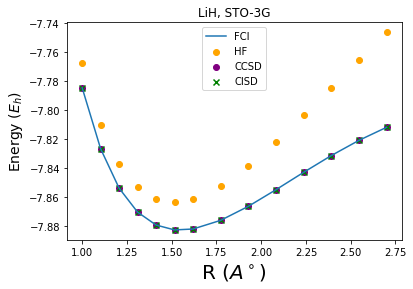

In [21]:
#Plot LiH PESs
plt.title('LiH, STO-3G')
plt.xlabel(r'R ($A^\circ$)',fontsize=20)
plt.ylabel(r'Energy ($E_h$)',fontsize=14)

plt.plot(bond_lengths, FCI_PES, label='FCI')
plt.scatter(bond_lengths, HF_PES, label='HF', color='orange')
plt.scatter(bond_lengths, CCSD_PES, label='CCSD', color='purple')
plt.scatter(bond_lengths, CISD_PES, label='CISD', color='green', marker='x')
plt.legend(loc = 'upper center')

$N_2$

$𝑟_0 = 1.119$ Angstrom

In [22]:
bond_lengths = [x for x in np.linspace(1.0,1.119,7)] 
bond_lengths += [x for x in np.linspace(1.120,1.5,8)]
print(bond_lengths)

[1.0, 1.0198333333333334, 1.0396666666666667, 1.0594999999999999, 1.0793333333333333, 1.0991666666666666, 1.119, 1.12, 1.1742857142857144, 1.2285714285714286, 1.282857142857143, 1.3371428571428572, 1.3914285714285715, 1.4457142857142857, 1.5]


In [23]:
#Run FCI
FCI_PES = obtain_PES('n2', bond_lengths, basis, method='fci')

converged SCF energy = -107.419532451682
E = -107.54930095790854 Eh
converged SCF energy = -107.44439201994
E = -107.57936182589182 Eh
converged SCF energy = -107.463939801382
E = -107.60426977073314 Eh
converged SCF energy = -107.478762050245
E = -107.62461218152751 Eh
converged SCF energy = -107.489386014866
E = -107.64091702373273 Eh
converged SCF energy = -107.496285635962
E = -107.65365858481638 Eh
converged SCF energy = -107.499886689299
E = -107.66326266182564 Eh
converged SCF energy = -107.4999879992
E = -107.66367090726257 Eh
converged SCF energy = -107.495586402914
E = -107.67654317744662 Eh
converged SCF energy = -107.475732233152
E = -107.67515353271176 Eh
converged SCF energy = -107.445164146148
E = -107.66422167708389 Eh
converged SCF energy = -107.407355286627
E = -107.64720402800934 Eh
converged SCF energy = -107.364832439239
E = -107.62662139272155 Eh
converged SCF energy = -107.31942346232
E = -107.604313776077 Eh
converged SCF energy = -107.272448501206
E = -107.5816

In [24]:
#Run HF
HF_PES = obtain_PES('n2', bond_lengths, basis,  method='hf')

converged SCF energy = -107.419532451682
converged SCF energy = -107.419532451682
E = -107.4195324516821 Eh
converged SCF energy = -107.44439201994
converged SCF energy = -107.44439201994
E = -107.44439201993978 Eh
converged SCF energy = -107.463939801382
converged SCF energy = -107.463939801382
E = -107.46393980138205 Eh
converged SCF energy = -107.478762050245
converged SCF energy = -107.478762050245
E = -107.47876205024451 Eh
converged SCF energy = -107.489386014866
converged SCF energy = -107.489386014866
E = -107.4893860148664 Eh
converged SCF energy = -107.496285635961
converged SCF energy = -107.496285635961
E = -107.4962856359615 Eh
converged SCF energy = -107.499886689299
converged SCF energy = -107.499886689299
E = -107.49988668929915 Eh
converged SCF energy = -107.4999879992
converged SCF energy = -107.4999879992
E = -107.49998799919956 Eh
converged SCF energy = -107.495586402914
converged SCF energy = -107.495586402914
E = -107.49558640291436 Eh
converged SCF energy = -107.

In [25]:
#Run CCSD
CCSD_PES = obtain_PES('n2', bond_lengths, basis,  method='ccsd')

converged SCF energy = -107.419532451682
E(CCSD) = -107.5467229244351  E_corr = -0.1271904727529141
E = -107.54672292443507 Eh
converged SCF energy = -107.44439201994
E(CCSD) = -107.5765596109187  E_corr = -0.1321675909789158
E = -107.5765596109187 Eh
converged SCF energy = -107.463939801382
E(CCSD) = -107.6012234804558  E_corr = -0.1372836790737659
E = -107.60122348045581 Eh
converged SCF energy = -107.478762050245
E(CCSD) = -107.6213005619513  E_corr = -0.1425385117067025
E = -107.62130056195127 Eh
converged SCF energy = -107.489386014866
E(CCSD) = -107.6373174734538  E_corr = -0.1479314585873443
E = -107.63731747345378 Eh
converged SCF energy = -107.496285635961
E(CCSD) = -107.6497471873566  E_corr = -0.1534615513951121
E = -107.64974718735664 Eh
converged SCF energy = -107.499886689299
E(CCSD) = -107.6590144349553  E_corr = -0.1591277456561057
E = -107.65901443495525 Eh
converged SCF energy = -107.4999879992
E(CCSD) = -107.6594050161181  E_corr = -0.1594170169184675
E = -107.659405

In [26]:
CISD_PES = get_cisd_pes('n2',bond_lengths)

converged SCF energy = -107.419532451682
E(RCISD) = -107.5413880040826  E_corr = -0.121855552400516
converged SCF energy = -107.444392019977
E(RCISD) = -107.5706873719469  E_corr = -0.1262953519699361
converged SCF energy = -107.463939801353
E(RCISD) = -107.5947691428798  E_corr = -0.1308293415263657
converged SCF energy = -107.478762050245
E(RCISD) = -107.6142167538112  E_corr = -0.13545470356673
converged SCF energy = -107.489386014881
E(RCISD) = -107.6295542327213  E_corr = -0.1401682178402681
converged SCF energy = -107.496285635953
E(RCISD) = -107.6412519740773  E_corr = -0.1449663381245636
converged SCF energy = -107.499886689299
E(RCISD) = -107.6497319564132  E_corr = -0.1498452671140491
converged SCF energy = -107.4999879992
E(RCISD) = -107.65008133127  E_corr = -0.1500933320705404
converged SCF energy = -107.495586402918
E(RCISD) = -107.6594244950633  E_corr = -0.1638380921455522
converged SCF energy = -107.475732233166
E(RCISD) = -107.6538055243109  E_corr = -0.17807329114508

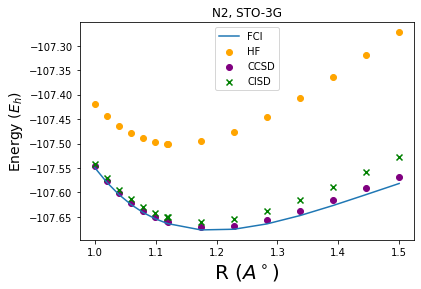

In [27]:
#Plot N2 PESs

plt.title('N2, STO-3G')
plt.xlabel(r'R ($A^\circ$)',fontsize=20)
plt.ylabel(r'Energy ($E_h$)',fontsize=14)

plt.plot(bond_lengths, FCI_PES, label='FCI')
plt.scatter(bond_lengths, HF_PES, label='HF', color='orange')
plt.scatter(bond_lengths, CCSD_PES, label='CCSD', color='purple')
plt.scatter(bond_lengths, CISD_PES, label='CISD', color='green', marker='x')
plt.legend(loc = 'upper center')

$H_4$

In [3]:
bond_angles = np.linspace(15.0,40.0,15)

In [4]:
#Run FCI
FCI_PES = obtain_PES('h4', bond_angles, basis, method='fci')

converged SCF energy = -1.98488287113067
E = -2.006871858726831 Eh
converged SCF energy = -2.09869359325099
E = -2.1234259293315123 Eh
converged SCF energy = -2.16974452446787
E = -2.1975716022716236 Eh
converged SCF energy = -2.21079297346973
E = -2.2420835314321894 Eh
converged SCF energy = -2.23046557734084
E = -2.265606646260297 Eh
converged SCF energy = -2.23480486317451
E = -2.2742036932991425 Eh
converged SCF energy = -2.22812531339812
E = -2.2722128688015872 Eh
converged SCF energy = -2.21352563644555
E = -2.2627613950641274 Eh
converged SCF energy = -2.19322972320541
E = -2.248106803985646 Eh
converged SCF energy = -2.16883474963959
E = -2.229884084719856 Eh
converged SCF energy = -2.1414981254735
E = -2.2092905344194027 Eh
converged SCF energy = -2.11207597728273
E = -2.1872214195136466 Eh
converged SCF energy = -2.0812208880512
E = -2.1643646561294316 Eh
converged SCF energy = -2.04944679011668
E = -2.1412628045773516 Eh
converged SCF energy = -2.017169537283
E = -2.11835115

In [5]:
#Run HF
HF_PES = obtain_PES('h4', bond_angles, basis,  method='hf')

converged SCF energy = -1.98488287113067
converged SCF energy = -1.98488287113067
E = -1.9848828711306745 Eh
converged SCF energy = -2.09869359325099


Overwritten attributes  get_ovlp get_hcore  of <class 'pyscf.scf.hf.RHF'>


converged SCF energy = -2.09869359325099
E = -2.098693593250987 Eh
converged SCF energy = -2.16974452446787
converged SCF energy = -2.16974452446787
E = -2.169744524467869 Eh
converged SCF energy = -2.21079297346973
converged SCF energy = -2.21079297346973
E = -2.210792973469727 Eh
converged SCF energy = -2.23046557734084
converged SCF energy = -2.23046557734084
E = -2.2304655773408415 Eh
converged SCF energy = -2.23480486317451
converged SCF energy = -2.23480486317452
E = -2.2348048631745154 Eh
converged SCF energy = -2.22812531339812
converged SCF energy = -2.22812531339812
E = -2.22812531339812 Eh
converged SCF energy = -2.21352563644555
converged SCF energy = -2.21352563644555
E = -2.2135256364455485 Eh
converged SCF energy = -2.19322972320541
converged SCF energy = -2.19322972320541
E = -2.1932297232054054 Eh
converged SCF energy = -2.16883474963959
converged SCF energy = -2.16883474963959
E = -2.168834749639588 Eh
converged SCF energy = -2.1414981254735
converged SCF energy = -2.

In [6]:
#Run CCSD
CCSD_PES = obtain_PES('h4', bond_angles, basis,  method='ccsd')

converged SCF energy = -1.98488287113067
E(CCSD) = -2.006871841316002  E_corr = -0.02198897018532968
E = -2.0068718413160025 Eh
converged SCF energy = -2.09869359325099
E(CCSD) = -2.123425898104841  E_corr = -0.02473230485385378
E = -2.123425898104841 Eh
converged SCF energy = -2.16974452446787
E(CCSD) = -2.197571547363218  E_corr = -0.0278270228953489
E = -2.197571547363218 Eh
converged SCF energy = -2.21079297346973
E(CCSD) = -2.242083473777973  E_corr = -0.0312905003082463
E = -2.2420834737779733 Eh
converged SCF energy = -2.23046557734084
E(CCSD) = -2.26560654896613  E_corr = -0.03514097162528882
E = -2.2656065489661303 Eh
converged SCF energy = -2.23480486317451
E(CCSD) = -2.274203600315103  E_corr = -0.03939873714058855
E = -2.274203600315103 Eh
converged SCF energy = -2.22812531339812
E(CCSD) = -2.272212799016382  E_corr = -0.04408748561826143
E = -2.272212799016382 Eh
converged SCF energy = -2.21352563644555
E(CCSD) = -2.262761351687927  E_corr = -0.04923571524238162
E = -2.262

In [9]:
CISD_PES = get_cisd_pes('h4',bond_angles)

converged SCF energy = -1.98488287101752
E(RCISD) = -2.006777575028098  E_corr = -0.02189470401057808
converged SCF energy = -2.09869359316515
E(RCISD) = -2.123295978229399  E_corr = -0.02460238506424894
converged SCF energy = -2.16974452442685
E(RCISD) = -2.197392639407383  E_corr = -0.02764811498053796
converged SCF energy = -2.21079297347614
E(RCISD) = -2.241837914860919  E_corr = -0.03104494138478025
converged SCF energy = -2.23046557734118
E(RCISD) = -2.265271339575866  E_corr = -0.03480576223468896
converged SCF energy = -2.2348048631729
E(RCISD) = -2.27374895155391  E_corr = -0.0389440883810115
converged SCF energy = -2.22812531339138
E(RCISD) = -2.27160063473813  E_corr = -0.04347532134675275
converged SCF energy = -2.2135256364706
E(RCISD) = -2.261943325425842  E_corr = -0.04841768895524369
converged SCF energy = -2.19322972324312
E(RCISD) = -2.2470218674471  E_corr = -0.05379214420397693
converged SCF energy = -2.16883474959223
E(RCISD) = -2.228455729317494  E_corr = -0.05962

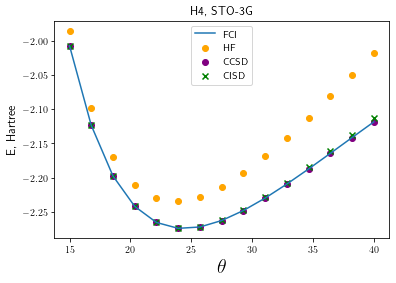

In [11]:
#Plot H4 PESs
import matplotlib
matplotlib.rcParams['text.usetex'] = True

plt.title('H4, STO-3G')
plt.xlabel(r'$\theta$',fontsize=20)
plt.ylabel('E, Hartree',fontsize=12)

plt.plot(bond_angles, FCI_PES, label='FCI')
plt.scatter(bond_angles, HF_PES, label='HF', color='orange')
plt.scatter(bond_angles, CCSD_PES, label='CCSD', color='purple')
plt.scatter(bond_angles, CISD_PES, label='CISD', color='green', marker='x')
plt.legend(loc = 'upper center')

$NH_3$

$r_0 = 1.008$

In [34]:
bond_lengths = [x for x in np.linspace(0.9,1.008,7)] 
bond_lengths += [x for x in np.linspace(1.009,1.25,8)]
print(bond_lengths)

[0.9, 0.918, 0.936, 0.954, 0.972, 0.99, 1.008, 1.009, 1.0434285714285714, 1.0778571428571428, 1.112285714285714, 1.1467142857142856, 1.181142857142857, 1.2155714285714285, 1.25]


In [35]:
#Run FCI
FCI_PES = obtain_PES('nh3', bond_lengths, basis, method='fci')

converged SCF energy = -55.3923579267289
E = -55.44295420403766 Eh
converged SCF energy = -55.4103046515789
E = -55.46298296188218 Eh
converged SCF energy = -55.424733431716
E = -55.479574056694304 Eh
converged SCF energy = -55.4359800143823
E = -55.493067179721365 Eh
converged SCF energy = -55.4443461985276
E = -55.50376823950252 Eh
converged SCF energy = -55.4501037627585
E = -55.51195328404481 Eh
converged SCF energy = -55.4534979374945
E = -55.51787196628811 Eh
converged SCF energy = -55.4536217639898
E = -55.51813897924335 Eh
converged SCF energy = -55.4541120603298
E = -55.523756170106964 Eh
converged SCF energy = -55.4481363637607
E = -55.52331346511703 Eh
converged SCF energy = -55.4368155136002
E = -55.51796661534382 Eh
converged SCF energy = -55.4210912634012
E = -55.50869345609699 Eh
converged SCF energy = -55.4017589901499
E = -55.49632608316294 Eh
converged SCF energy = -55.3794925103696
E = -55.48157492642131 Eh
converged SCF energy = -55.3548631222389
E = -55.46504680697

In [36]:
#Run HF
HF_PES = obtain_PES('nh3', bond_lengths, basis,  method='hf')

converged SCF energy = -55.3923579267289
converged SCF energy = -55.392357926729
E = -55.39235792672899 Eh
converged SCF energy = -55.4103046515789
converged SCF energy = -55.4103046515791
E = -55.41030465157906 Eh
converged SCF energy = -55.424733431716
converged SCF energy = -55.424733431716
E = -55.42473343171605 Eh
converged SCF energy = -55.4359800143823
converged SCF energy = -55.4359800143823
E = -55.43598001438234 Eh
converged SCF energy = -55.4443461985276
converged SCF energy = -55.4443461985276
E = -55.444346198527555 Eh
converged SCF energy = -55.4501037627585
converged SCF energy = -55.4501037627585
E = -55.45010376275853 Eh
converged SCF energy = -55.4534979374945
converged SCF energy = -55.4534979374945
E = -55.453497937494475 Eh
converged SCF energy = -55.4536217639897
converged SCF energy = -55.4536217639898
E = -55.453621763989766 Eh
converged SCF energy = -55.4541120603298
converged SCF energy = -55.4541120603299
E = -55.45411206032986 Eh
converged SCF energy = -55.4

In [37]:
#Run CCSD
CCSD_PES = obtain_PES('nh3', bond_lengths, basis,  method='ccsd')

converged SCF energy = -55.3923579267289
E(CCSD) = -55.44283816734221  E_corr = -0.05048024061331514
E = -55.44283816734221 Eh
converged SCF energy = -55.4103046515789
E(CCSD) = -55.4628554786438  E_corr = -0.05255082706491951
E = -55.462855478643796 Eh
converged SCF energy = -55.424733431716
E(CCSD) = -55.47943366501284  E_corr = -0.05470023329682066
E = -55.47943366501284 Eh
converged SCF energy = -55.4359800143823
E(CCSD) = -55.49291225050337  E_corr = -0.05693223612110073
E = -55.492912250503366 Eh
converged SCF energy = -55.4443461985275
E(CCSD) = -55.50359696551067  E_corr = -0.05925076698312424
E = -55.50359696551067 Eh
converged SCF energy = -55.4501037627585
E(CCSD) = -55.51176366959959  E_corr = -0.0616599068410567
E = -55.51176366959959 Eh
converged SCF energy = -55.4534979374945
E(CCSD) = -55.51766181875581  E_corr = -0.06416388126133571
E = -55.51766181875581 Eh
converged SCF energy = -55.4536217639898
E(CCSD) = -55.51792762262778  E_corr = -0.06430585863804315
E = -55.517

In [38]:
CISD_PES = get_cisd_pes('nh3',bond_lengths)

converged SCF energy = -55.3923579267128
E(RCISD) = -55.44212365438828  E_corr = -0.04976572767543549
converged SCF energy = -55.4103046515725
E(RCISD) = -55.46206039811126  E_corr = -0.05175574653876411
converged SCF energy = -55.4247334317112
E(RCISD) = -55.47854932619715  E_corr = -0.05381589448593294
converged SCF energy = -55.4359800143865
E(RCISD) = -55.49192900630698  E_corr = -0.05594899192044153
converged SCF energy = -55.4443461985254
E(RCISD) = -55.50250410158383  E_corr = -0.05815790305843969
converged SCF energy = -55.4501037627538
E(RCISD) = -55.51054928248309  E_corr = -0.06044551972928008
converged SCF energy = -55.4534979374959
E(RCISD) = -55.51631267968058  E_corr = -0.06281474218463873
converged SCF energy = -55.4536217639893
E(RCISD) = -55.51657058055796  E_corr = -0.0629488165686172
converged SCF energy = -55.4541120603316
E(RCISD) = -55.52183954716842  E_corr = -0.0677274868368502
converged SCF energy = -55.4481363637661
E(RCISD) = -55.52097194074523  E_corr = -0.

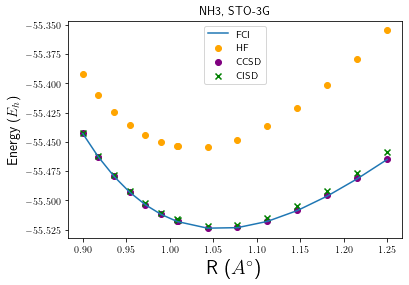

In [39]:
#Plot NH3 PESs
import matplotlib
matplotlib.rcParams['text.usetex'] = True

plt.title('NH3, STO-3G')
plt.xlabel(r'R ($A^\circ$)',fontsize=20)
plt.ylabel(r'Energy ($E_h$)',fontsize=14)

plt.plot(bond_lengths, FCI_PES, label='FCI')
plt.scatter(bond_lengths, HF_PES, label='HF', color='orange')
plt.scatter(bond_lengths, CCSD_PES, label='CCSD', color='purple')
plt.scatter(bond_lengths, CISD_PES, label='CISD', color='green', marker='x')
plt.legend(loc = 'upper center')

# Checking Size Consistency

In [14]:
r0 = 0.741
hf_PES = obtain_PES('h2', [r0], basis, method='hf')
cisd_PES = obtain_PES('h2', [r0], basis, method='cisd')
cisd_PES = get_cisd_pes('h2',[r0])
ccsd_PES = obtain_PES('h2', [r0], basis, method='ccsd')

hf_PES2 = obtain_PES('h2x2', [100], basis, method='hf')
cisd_PES2 = get_cisd_pes('h2x2',[r0])
ccsd_PES2 = obtain_PES('h2x2', [100], basis, method='ccsd')

converged SCF energy = -1.1167061372361
converged SCF energy = -1.11670613723611
E = -1.1167061372361051 Eh
converged SCF energy = -1.1167061372361
converged SCF energy = -1.11670611454263
converged SCF energy = -1.11670609184885
converged SCF energy = -1.11670606915477
converged SCF energy = -1.11670604646039
converged SCF energy = -1.1167060237657
converged SCF energy = -1.11670600107071
converged SCF energy = -1.11670597837541
converged SCF energy = -1.11670595567981
converged SCF energy = -1.11670593298391
Could not converge
converged SCF energy = -1.11670613723611
E(RCISD) = -1.13727440552944  E_corr = -0.02056826829333391
converged SCF energy = -1.1167061372361
E(CCSD) = -1.137274570976643  E_corr = -0.02056843374053732
E = -1.1372745709766425 Eh
converged SCF energy = -2.23341227446986
converged SCF energy = -2.23341227446986
E = -2.2334122744698552 Eh
converged SCF energy = -2.09846837171682
E(RCISD) = -2.13925245266723  E_corr = -0.04078408095040715
converged SCF energy = -2.2

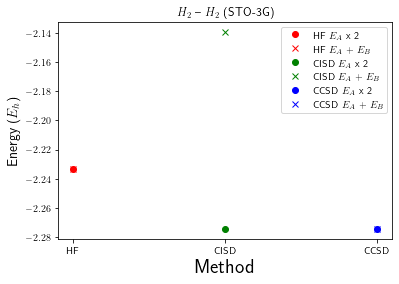

In [23]:
import matplotlib
matplotlib.rcParams['text.usetex'] = True

plt.title(r'$H_2$ -- $H_2$ (STO-3G)')
plt.xlabel(r'Method',fontsize=20)
plt.ylabel(r'Energy ($E_h$)',fontsize=14)

plt.plot([1], hf_PES*2, 'ro', label=r'HF $E_A$ x 2')
plt.plot([1], hf_PES2, 'rx', label=r'HF $E_A$ + $E_B$')

plt.plot([2], cisd_PES*2, 'go', label=r'CISD $E_A$ x 2')
plt.plot([2], cisd_PES2, 'gx', label=r'CISD $E_A$ + $E_B$')

plt.plot([3], ccsd_PES*2, 'bo', label=r'CCSD $E_A$ x 2')
plt.plot([3], ccsd_PES2, 'bx', label=r'CCSD $E_A$ + $E_B$')

plt.xticks([1, 2, 3], ['HF', 'CISD', 'CCSD'])
plt.legend(loc = 'upper right')

# Exploring electron correlation and basis dependence

In [46]:
import pyscf
from pyscf import gto
from pyscf import cc
    
methods = ['hf','cisd','ccsd','ccsd(t)','ccsdt']
basis = ['sto3g','ccpvdz','ccpvtz','ccpvqz','ccpv5z']
energies = np.zeros([5,5])      
         
for i in range(len(basis)):
#for i in range(1):
    mol = gto.Mole()
    mol.atom = get_molecular_data('h2', 0.741, xyz_format=False)
    mol.basis = basis[i]
    mol.build()
    
    print('\nBasis: ',basis[i])
    mf = mol.HF().run()
    energies[0,i] = mf.e_tot
    
    mycc = mf.CISD().run()
    energies[1,i] = mycc.e_tot
    
    ccsd_h2 = cc.CCSD(mf)
    rv = ccsd_h2.kernel()    
    energies[2,i] = rv[0] + energies[0,i]
    energies[3,i] = energies[2,i] + ccsd_h2.ccsd_t()
       
    


Basis:  sto3g
converged SCF energy = -1.11670613723611
E(RCISD) = -1.13727440552944  E_corr = -0.02056826829333391
E(CCSD) = -1.137274570976645  E_corr = -0.02056843374053884
CCSD(T) correction = -1.65863679163582e-49

Basis:  ccpvdz
converged SCF energy = -1.12871101091532
E(RCISD) = -1.163402961063555  E_corr = -0.03469195014823102
E(CCSD) = -1.163402967174229  E_corr = -0.03469195625890499
CCSD(T) correction = -2.05836407587941e-19

Basis:  ccpvtz
converged SCF energy = -1.13295913881568
E(RCISD) = -1.172334937115363  E_corr = -0.03937579829968096
E(CCSD) = -1.172334901959213  E_corr = -0.03937576314353191
CCSD(T) correction = -1.70522655324425e-21

Basis:  ccpvqz
converged SCF energy = -1.1334575087222
E(RCISD) = -1.173795980839229  E_corr = -0.04033847211702902
E(CCSD) = -1.1737959794066  E_corr = -0.04033847068439989
CCSD(T) correction = -1.29193190977219e-19

Basis:  ccpv5z
converged SCF energy = -1.13360662616692
E(RCISD) = -1.174222792990705  E_corr = -0.04061616682378977
E(C

In [47]:
energies

array([[-1.11670614, -1.12871101, -1.13295914, -1.13345751, -1.13360663],
       [-1.13727441, -1.16340296, -1.17233494, -1.17379598, -1.17422279],
       [-1.13727457, -1.16340297, -1.1723349 , -1.17379598, -1.17422279],
       [-1.13727457, -1.16340297, -1.1723349 , -1.17379598, -1.17422279],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])

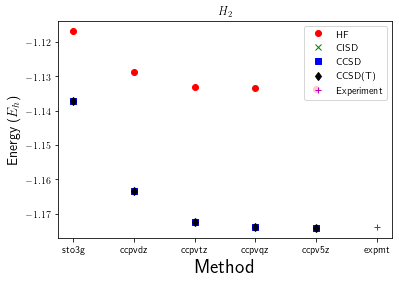

In [57]:
import matplotlib
matplotlib.rcParams['text.usetex'] = True


plt.title(r'$H_2$')
plt.xlabel(r'Method',fontsize=20)
plt.ylabel(r'Energy ($E_h$)',fontsize=14)

xvals = [1,2,3,4,5]
plt.plot(xvals, energies[0], 'ro', label='HF')
plt.plot(xvals, energies[1], 'gx', label='CISD')
plt.plot(xvals, energies[2], 'bs', label='CCSD')
plt.plot(xvals, energies[3], 'kd', label='CCSD(T)')

#Experimental data
#at r_0 = 0.741 A bindign energy is 4.74 eV
E_exp = (-13.6*2 - 4.74)*0.0367493
plt.plot(6, E_exp, 'm+', label='Experiment')
plt.xticks(xvals + [6], basis + ['expmt'])

plt.legend(loc = 'upper right')

In [58]:
-1.17422279 - E_exp

-0.0004501480000000946

In [59]:
E_exp

-1.1737726419999999